<span style="color: Blue;">**Diabetes Prediction Competition**</span>


**Dataset Description**

The dataset is intended for a binary classification task focused on predicting whether an individual is likely to have diabetes. It includes 17 feature variables representing different health and lifestyle characteristics, along with one target variable, "Diabetes," where 0 denotes the absence of diabetes and 1 indicates its presence. The main objective is to build models capable of accurately estimating the probability of diabetes using the given features, and in this case, <span style="color: Blue;">Light Gradient Boosting Machine (LightGBM)</span> will be used as the primary modeling algorithm due to its efficiency and ability to handle both numeric and categorical data effectively.

**Data Source:** kaggle competitions download -c diabetes-prediction-competitiontfug-chd-nov-2022

In [ ]:
# Importing Required Libraries for Data Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the Training Data and Displaying the First Few Row
df = pd.read_csv('train_data.csv')
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Summing Up All Missing (NaN) Values Across the Dataset
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# Checking Dataset Summary Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80692 entries, 0 to 80691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   80692 non-null  float64
 1   Sex                   80692 non-null  float64
 2   HighChol              80692 non-null  float64
 3   CholCheck             80692 non-null  float64
 4   BMI                   80692 non-null  float64
 5   Smoker                80692 non-null  float64
 6   HeartDiseaseorAttack  80692 non-null  float64
 7   PhysActivity          80692 non-null  float64
 8   Fruits                80692 non-null  float64
 9   Veggies               80692 non-null  float64
 10  HvyAlcoholConsump     80692 non-null  float64
 11  GenHlth               80692 non-null  float64
 12  MentHlth              80692 non-null  float64
 13  PhysHlth              80692 non-null  float64
 14  DiffWalk              80692 non-null  float64
 15  Diabetes           

In [ ]:
# Rounding Numeric Values and Converting Columns to Integer Type
df = df.round(0).astype(int)

In [ ]:
# Displaying the First 3 Rows of the Dataset
df.head(3)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,0,1,1
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0,0


In [ ]:
print(df.dtypes)

Age                     int64
Sex                     int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Diabetes                int64
Hypertension            int64
Stroke                  int64
dtype: object


In [ ]:
# Define the categorical columns
cat_cols = ['Sex','HighChol','CholCheck', 'HeartDiseaseorAttack','PhysActivity','Fruits', 'Veggies', 'HvyAlcoholConsump','GenHlth', 'DiffWalk', 'Hypertension', 'Stroke', 'Diabetes']

# Convert them to categorical type
df[cat_cols] = df[cat_cols].astype('category')

In [ ]:
# Displaying Summary Statistics for Categorical Columns
df.describe(include = ('object', 'category')).T

,count,unique,top,freq
Sex,80692,2,0,41805
HighChol,80692,2,1,41859
CholCheck,80692,2,1,78246
HeartDiseaseorAttack,80692,2,0,69248
PhysActivity,80692,2,1,54940
Fruits,80692,2,1,47508
Veggies,80692,2,1,62757
HvyAlcoholConsump,80692,2,0,77342
GenHlth,80692,5,3,27564
DiffWalk,80692,2,0,59884


In [ ]:
# Applying One-Hot Encoding to Categorical Variables and Previewing the Dataset
pd.get_dummies(df, columns = cat_cols, drop_first = True)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,0,1,1
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,0,1,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0


**Exploratory Data Analysis (EDA)**

In [ ]:
# Splitting Dataset into Features (X) and Target (y)
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

In [ ]:
# Importing Train-Test Split Function from Scikit-Learn
from sklearn.model_selection import train_test_split

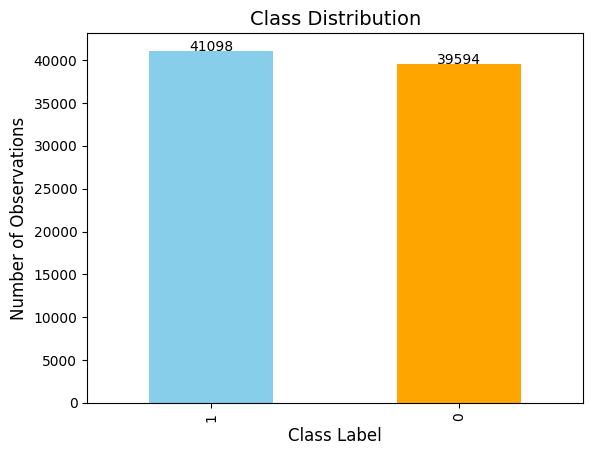

In [ ]:
# Plot class distribution
ax = y.value_counts().plot(kind='bar', color=['skyblue', 'orange'])

# Add title and axis labels
plt.title("Class Distribution", fontsize=14)
plt.xlabel("Class Label", fontsize=12)
plt.ylabel("Number of Observations", fontsize=12)

# Add value labels on top of each bar
for i, count in enumerate(y.value_counts()):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

plt.show()

*This bar chart shows the number of observations in each class of the target variable. It helps check whether the dataset is balanced or if there is class imbalance.*

In [ ]:
# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

LightGBM is a tree-based model that makes decisions by comparing values in the data rather than using distances or gradients, so there is no need to scale the features.

In [ ]:
# Importing LightGBM Classifier for Model Training
from lightgbm import LGBMClassifier

In [ ]:
# Installing Bayesian Optimization Package
!pip install bayesian-optimization

In [ ]:
# Importing Bayesian Optimization Module for Hyperparameter Tuning
from bayes_opt import BayesianOptimization

In [ ]:
# Define the evaluation function for Bayesian Optimization
def lgb_eval(n_estimators, learning_rate, max_depth):
    # Convert floats to integers where needed
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)

    # Initialize the LightGBM classifier
    model = LGBMClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=2
    )

    return 0

# Define parameter bounds for optimization
param_bounds = {
    'n_estimators': (50, 300),
    'learning_rate': (0.01, 0.5),
    'max_depth': (3, 15)
}

# Initialize Bayesian Optimizer
optimizer = BayesianOptimization(
    f=lgb_eval,
    pbounds=param_bounds,
    random_state=2,
    verbose=2
)

In [ ]:
# Executing Bayesian Optimization Process to Tune Model Hyperparameters
optimizer.maximize(
    init_points=3,
    n_iter=5
)

|   iter    |  target   | n_esti... | learni... | max_depth |
-------------------------------------------------------------
| 1         | 0.0       | 158.99872 | 0.0227038 | 9.5959497 |
| 2         | 0.0       | 158.83059 | 0.2159802 | 6.9640178 |
| 3         | 0.0       | 101.16215 | 0.3134427 | 6.5958560 |
| 4         | 0.0       | 299.97985 | 0.2862534 | 10.527939 |
| 5         | 0.0       | 50.299946 | 0.2761145 | 14.557504 |
| 6         | 0.0       | 299.93436 | 0.1073572 | 14.511523 |
| 7         | 0.0       | 50.021181 | 0.1422615 | 3.5520153 |
| 8         | 0.0       | 298.52233 | 0.4927745 | 3.0344853 |


In [ ]:
# Extracting and Displaying the Best Hyperparameters from Bayesian Optimization
best_params = optimizer.max['params']

# Convert integer hyperparameters
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])

print("Best hyperparameters found:")
print(best_params)

Best hyperparameters found:
{'n_estimators': 158, 'learning_rate': np.float64(0.022703853595666755), 'max_depth': 9}


In [ ]:
# Training the Final LightGBM Model Using Optimized Hyperparameters

# Initialize the model with the best hyperparameters
final_model = LGBMClassifier(**best_params, random_state=1)

# Fit the model on the training data only
final_model.fit(X_train, y_train)

# Optionally, evaluate on the test set
y_pred = final_model.predict(X_test)

[LightGBM] [Info] Number of positive: 32785, number of negative: 31768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 64553, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507877 -> initscore=0.031512
[LightGBM] [Info] Start training from score 0.031512


LightGBM successfully trained a binary classification model on a balanced dataset (approximately 50/50 classes), using 17 features and over 64k samples.

In [ ]:
# Evaluating Model Performance Using Accuracy Score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.7512237437263771


The model correctly predicted the target class (Diabetes = 0 or 1) about 75% of the time. Out of every 100 test samples, approximately 75 were classified correctly.

**`Since this dataset was originally part of a past competition, there is no need to generate or submit predictions for evaluation. The purpose of this analysis is purely for learning and model performance assessment. Therefore, I will not be creating a submission dataset or using the model to make predictions on the test data intended for competition submission. The focus remains on understanding the modeling process and evaluating its performance within the available training and validation sets.`**